## Start measurments

In [ ]:
#%matplotlib notebook
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import panda2.panda2 as panda2

import panda2.analysis.fitfunctions as fitfunc
import panda2.scans.injection_scan as injection_scan


# run "ping" command
!ping -c 1 192.168.10.16

# instancíate a Panda2 class
dut = panda2.Panda2()
# read yaml file and connect to FPGA
dut.init()
dut.set_sync(auto_sync=True)  ## do not delete this


## Change settings (global, tdac, comp_en/dis etc)

In [18]:
# define col, row
col, row = 15, 31
### configure chip and enable injection
dut.set_en_inj([col, row])

# this is for Injection card
dut.set_inj_amp(1.0)

# set ampout ON
#dut.set_en_ampout([col])
dut.set_en_ampout([])


### inj_n: number of pulses to be injected. 0=continuous injection
# 1 = 1 clock of 40MHz = 25ns  inj_n= number of pulses to be injected, 0= inf
dut.set_inj(inj_n=100, inj_width=1024*8, inj_delay=1024*8, ext=True)
dut.inject()

#hui
## set all tdac to 0
#dut.set_tdac(7, comp='fast')
### slow comp
tdac1 = np.copy(dut.PixelConf['tdac1'])
tdac1[:, :] = 7    # until 7
dut.set_tdac(tdac1, comp='slow')
VDACTh2=166# 176 used for tune ivan the setting for threshold scan was was 150+26
#VDACTh2=250#150+26

##fast comp
tdac0 = np.copy(dut.PixelConf['tdac0'])
tdac0[:, :] = 7   # until 7
dut.set_tdac(tdac0, comp='fast')
#VDACTh=250
VDACTh=182 #ivan 195 used for tune!

# sets VDAC and DAC
dut.set_conf(
             IPBigFine= 15,
             IPSmallFine= 23,
             VDACTh=VDACTh,  # fast comparator, 255= very high (alomost off)
             VDACTh2=VDACTh2, # slow comparator, ~128 =  a bit higher than VDACBL 
             VDACBL=102+26,  # base line ~100~128 
             VNComp=40, # default =10
             VNComp2=0,
             VN=32, 
             INFoll2=20, 
             hidrEnB=1,   #1 disalbe, 0 enalbe
             IBLRes=1,    # R of Bl
             IPDAC=50,   #15 step of TDAC default default value=8, TDAC off = 0, ivan was 16 was for first scan 10 ivan
             VNLVDS = 20,
             VNLVDSDel = 0,
             Invert = 1,
             VPDcl = 32,
             VNDcl = 32,
             IPFoll=10, # current for Ampout and HitBus defalt=10, OFF=0 (better for cross talk) 
                        # TDAC=7 no offset, TDAC=0 max negative offset
            )  ## set lowest (largest in number) threshold
            # IPDAC until 63
# sets comparator 
en_comp = np.copy(dut.PixelConf['en_comp0'])
### set all comp off
en_comp[:,:] = 0
dut.set_en_comp(en_comp, comp='slow')
dut.set_en_comp(en_comp, comp='fast')
### set comp1 col=10, row=0 ON
en_comp[col, row] = 1
#hui
dut.set_en_comp(en_comp, comp='slow')
dut.set_en_comp(en_comp, comp='fast')
                #comp='slow')  ## 0= fast comp, 1 = slow

dut.set_en_hitbus([])

# set_sync: set SyncRes
dut.set_sync(auto_sync=True)


# set timestamp module ON
dut.set_ts_inj(True)

# set the data reciever ON
dut.set_rx(True)
# but mask data for this moment
dut['data_rx'].SAMPLING_EDGE=0
dut.mask_rx(True)


2024-06-10 17:28:39,246 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00008000 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000_00000 en_injection_row1=00000_00000_00000_00000_00000_00000_00000_00000_00100_00000_00000_00000_00000_00000_00000
2024-06-10 17:28:39,247 - root - [INFO    ] (MainThread) inj_amp: 4573
2024-06-10 17:28:39,250 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000000
2024-06-10 17:28:39,258 - root - [INFO    ] (MainThread) _write_conf row0 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,263 - root - [INFO    ] (MainThread) _write_conf row1 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,269 - root - [INFO    ] (MainThread) _write_conf row2 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 

++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


2024-06-10 17:28:39,447 - root - [INFO    ] (MainThread) _write_conf row30 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,457 - root - [INFO    ] (MainThread) _write_conf row31 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,466 - root - [INFO    ] (MainThread) _write_conf row32 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,475 - root - [INFO    ] (MainThread) _write_conf row33 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,483 - root - [INFO    ] (MainThread) _write_conf row34 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7

++++++++++++++comp fast++++++++++++++ [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


2024-06-10 17:28:39,981 - root - [INFO    ] (MainThread) _write_conf row23 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:39,994 - root - [INFO    ] (MainThread) _write_conf row24 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:40,006 - root - [INFO    ] (MainThread) _write_conf row25 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:40,014 - root - [INFO    ] (MainThread) _write_conf row26 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:40,019 - root - [INFO    ] (MainThread) _write_conf row27 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [31]
++++++++++++++comp fast++++++++++++++ [31]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [31]
++++++++++++++comp fast++++++++++++++ [31]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:28:40,567 - root - [INFO    ] (MainThread) set_rx: aligned=1


In [ ]:
dut.get_configuration()

In [ ]:
dut.mask_rx(False)
time.sleep(1)
raw = dut.get_data_now()
dut.mask_rx(True)
len(raw)

## Scurve scans

### 1 pixel scan

2024-06-10 17:29:03,740 - root - [INFO    ] (MainThread) Initializing InjectionScan
2024-06-10 17:29:03,741 - root - [INFO    ] (MainThread) Scan start time: 2024-06-10_17:29:03
2024-06-10 17:29:03,807 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2024-06-10 17:29:03,978 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:29:04,305 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:29:04,409 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:29:04,410 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:29:04,411 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:29:04,413 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:29:04,414 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:29:04,415 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:29:04,420 - root - [INFO    ] (Main

0.00s 19558/19558 hit=2597 ts=2200
th=0.062 th_sigma=0.005 Vinj


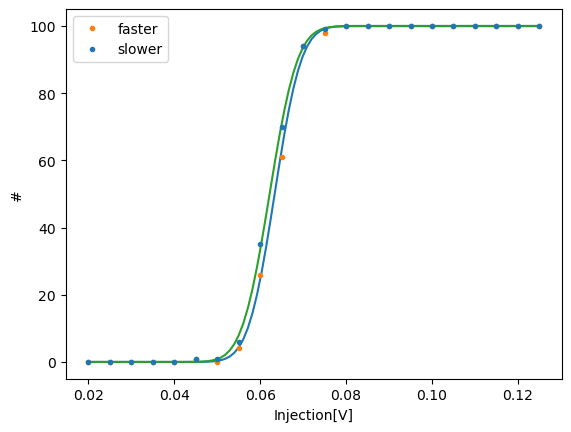

In [20]:
### only one selected pixel

#dut.set_inj_amp(0.015, 'V')  # set amp to 200mV





scan = injection_scan.InjectionScan(dut=dut)
fraw = scan.start(inj=np.arange(0.02, 0.13, 0.005), # ivan was step 0.005
                  cols=None, 
                  rows=None)
fhit = scan.analyze()


## get data from hit file (event_data)
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
## get data from raw data (scan_parameters)
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

## select hits from comparator0
dat0 = dat[dat['comp']==0]
if len(dat0)!=0:
    ## take only the first data (delete hits from the rising edges)
    uni, idx= np.unique(dat0['timestamp'], return_index=True)
    dat0 = dat0[idx]
    ## count hits per event_number
    nhit = np.bincount(dat0['event_number'])
    fit = fitfunc.fit_scurve(param['inj'], nhit, reverse=False)
    x = np.linspace(np.min(param['inj']), np.max(param['inj']), num=100)
    plt.plot(x, fitfunc.scurve(x,*fit[:3]), '-')

    # make a plot (injection vs n of hits)
    plt.plot(param['inj'], nhit, '.', label='faster')

## select hits from comparator1
dat1 = dat[dat['comp']==1]
if len(dat1)!=0:
#print(dat1)
    uni, idx = np.unique(dat1['timestamp'], return_index=True)
    dat1 = dat1[idx]
    nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))
    fit = fitfunc.fit_scurve(param['inj'], nhit1, reverse=False)
    x = np.linspace(np.min(param['inj']), np.max(param['inj']), num=100)
    plt.plot(x, fitfunc.scurve(x,*fit[:3]), '-')
    plt.plot(param['inj'], nhit1, 'C0.', label='slower')

## show x-axis and y-axis and legend
plt.xlabel('Injection[V]')
plt.ylabel('#')
plt.legend()

## print threshold
print('th={0:.3f} th_sigma={1:.3f} Vinj'.format(fit[1], fit[2]))




### 9 pixels

In [ ]:
## 9 pixels


##tdac1[:,:]=7
for t in [7,6,5,4,3,2,1,0]:#,5,4,3,2,1,0]:
    #for col in range(dut.ncols):#[13,14]:#,15]:#,16]:   #
    for col in [13,14,15]:#,15]:#,16]:   #
        for row in range(dut.nrows):#[30,31]:#, 31]:#, 32]:    #
    #for col in [13,14,15]:#,15]:#,16]:   #
        #for row in [31,32,33]:#, 31]:#, 32]:    #
            print('+++++++++++++++++++++++++++++++++++++')
            print('++++ ', t, col, row,'+++++++++++++')




            dut.set_en_inj([col, row])
            tdac1[:,:]=7
            tdac1[col, row] = t

            #en_comp[col, row] = 1

            #dut.set_en_comp(en_comp, comp='slow')
            
            en_comp[:,:] = 0#Ivan works when all are enabled

            #dut.set_ram(tdac=tdac1, en_comp=en_comp, comp='slow')

            en_comp[col, row] = 1

            #dut.set_en_comp(en_comp, comp='fast')#not needed ivan
            
            dut.set_ram(tdac=tdac1, en_comp=en_comp, comp='slow')

            #dut.set_conf()
            


            alg=0
            while alg!=1:
                alg = dut.set_rx(True)

            #time.sleep(1000 / 1000)
            #print(col, row, t)




            dut.set_inj_amp(0.015, 'V')  # set amp to 200mV  
            scan = injection_scan.InjectionScan(dut=dut)
            fraw = scan.start(inj=np.arange(0.020, 0.15, 0.005), #change from 0.04 till 0.125 ivan step 0.005
                              cols=None, 
                              rows=None)

### all pixels

In [ ]:
#don't use this ivan

dut.set_inj_amp(1.0, 'V')
for t in [7,6,5,4,3,2,1,0]:
    for col in [14,15,16]:   #range(dut.ncols):
        for row in [30, 31, 32]:    #range(dut.nrows):
            dut.set_en_inj([col, row])

            tdac1[:,:]=7
            tdac1[col, row] = t
            dut.set_tdac(tdac1, comp='slow')

            dut.set_conf()

            en_comp[:,:] = 0
            en_comp[col, row] = 1
            dut.set_en_comp(en_comp, comp='slow')  ##hui 0= fast comp, 1 = slow 
            alg=0
            while alg!=1:
               alg = dut.set_rx(True)
            dut.mask_rx(False)
            raw=dut.get_data()
            dut.mask_rx(True)
            print(col, row, len(raw))
            #print((raw&0xF000_0000==0x0000_00000).sum())

### close scan (run this when you stopped with the square buttom)

In [ ]:
scan.close()

In [ ]:
dut.mask_rx(False)
time.sleep(1)
print(len(dut.get_data_now()))
dut.mask_rx(True)

In [ ]:
cnt=0
t0 = time.time()
dut['data_rx'].SAMPLING_EDGE=1
if True:
    for i in range(1000):
        cnt = cnt + dut.get_rx_status()['aligned'] #,dut['data_rx'].SAMPLING_EDGE
        #time.sleep(0.01)
    print(time.time()-t0, cnt)
dut.get_rx_status()['aligned']

In [21]:
## th scan of all pixels Hui
#for col in range(dut.ncols):
for col in [13,14,15]:#,15]:#,16]:   #
    for row in range(dut.nrows):

#for col in [13,14,15]:#,15]:#,16]:   #
    #for row in [31,32,33]:#, 31]:#, 32]:    #



        dut.mask_rx(True)
        ## enable comp
        en_comp[:,:] = 0
        en_comp[col, row] = 1
        dut.set_en_comp(en_comp, comp='slow')  ## 0= fast comp, 1 = slow
        dut.set_en_comp(en_comp, comp='fast')  ## 0= fast comp, 1 = slow
        ## enable inj
        dut.set_en_inj([col, row])
        ## start scan
        dut.set_inj_amp(0.001, 'V')  # set amp to 200mV  
        scan = injection_scan.InjectionScan(dut=dut)
        fraw = scan.start(inj=np.arange(0.02, 0.5, 0.005),#0.15 
                          cols=None, 
                          rows=None)
        fhit = scan.analyze()#ivan this erzeugt hit

2024-06-10 17:30:23,580 - root - [INFO    ] (MainThread) _write_conf row0 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 2 2 1 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:30:23,587 - root - [INFO    ] (MainThread) _write_conf row31 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 5 4 5 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:30:23,593 - root - [INFO    ] (MainThread) _write_conf row0 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 0 2 0 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:30:23,599 - root - [INFO    ] (MainThread) _write_conf row31 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 6 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:30:23,603 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00002000 en_injection_row0=00000_00000_00000_00000_00000_00000_00000_00000_00000_00000

++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 0 31]
++++++++++++++comp fast++++++++++++++ [ 0 31]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:30:23,842 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:30:24,192 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:30:24,295 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:30:24,296 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:30:24,298 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:30:24,299 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:30:24,300 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:30:24,301 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:30:24,304 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:30:24,308 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:30:24,434 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:30:24,438 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:30:24,604 - root - [

0.00s 115806/115806 hit=17419 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [0 1]
++++++++++++++comp fast++++++++++++++ [0 1]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:30:40,683 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:30:41,011 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:30:41,116 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:30:41,117 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:30:41,118 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:30:41,119 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:30:41,120 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:30:41,121 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:30:41,122 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:30:41,126 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:30:41,251 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:30:41,256 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:30:41,421 - root - [

0.00s 115529/115529 hit=17356 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [1 2]
++++++++++++++comp fast++++++++++++++ [1 2]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:30:57,513 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:30:57,845 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:30:57,947 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:30:57,948 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:30:57,949 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:30:57,950 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:30:57,951 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:30:57,951 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:30:57,953 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:30:57,956 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:30:58,090 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:30:58,095 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:30:58,254 - root - 

0.00s 115584/115584 hit=17367 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [2 3]
++++++++++++++comp fast++++++++++++++ [2 3]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:31:14,332 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 17:31:14,469 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:31:14,573 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:31:14,575 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:31:14,576 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:31:14,577 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:31:14,578 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:31:14,578 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:31:14,580 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:31:14,584 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:31:14,709 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:31:14,716 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:31:14,882 - root - [

0.00s 115362/115362 hit=17334 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [3 4]
++++++++++++++comp fast++++++++++++++ [3 4]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:31:30,994 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:31:31,352 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:31:31,455 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:31:31,456 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:31:31,457 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:31:31,458 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:31:31,459 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:31:31,460 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:31:31,463 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:31:31,467 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:31:31,595 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:31:31,600 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:31:31,765 - root - 

0.00s 115509/115509 hit=17362 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [4 5]
++++++++++++++comp fast++++++++++++++ [4 5]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:31:47,840 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:31:48,169 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:31:48,272 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:31:48,274 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:31:48,276 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:31:48,277 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:31:48,278 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:31:48,280 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:31:48,283 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:31:48,288 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:31:48,414 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:31:48,420 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:31:48,576 - root - 

0.00s 115688/115688 hit=17390 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [5 6]
++++++++++++++comp fast++++++++++++++ [5 6]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:32:04,682 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:32:05,046 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:32:05,148 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:32:05,150 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:32:05,151 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:32:05,153 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:32:05,154 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:32:05,155 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:32:05,160 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:32:05,164 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:32:05,289 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:32:05,295 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:32:05,461 - root - 

0.00s 115837/115837 hit=17416 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [6 7]
++++++++++++++comp fast++++++++++++++ [6 7]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:32:21,547 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:32:21,878 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:32:21,982 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:32:21,983 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:32:21,985 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:32:21,988 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:32:21,989 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:32:21,990 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:32:21,992 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:32:21,997 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:32:22,127 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:32:22,132 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:32:22,289 - root - [

0.00s 115846/115846 hit=17423 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [7 8]
++++++++++++++comp fast++++++++++++++ [7 8]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:32:38,385 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:32:38,708 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:32:38,812 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:32:38,813 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:32:38,813 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:32:38,814 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:32:38,815 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:32:38,815 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:32:38,818 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:32:38,821 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:32:38,950 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:32:38,956 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:32:39,116 - root - 

0.00s 115441/115441 hit=17339 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [8 9]
++++++++++++++comp fast++++++++++++++ [8 9]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:32:55,215 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:32:55,568 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:32:55,671 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:32:55,672 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:32:55,672 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:32:55,673 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:32:55,674 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:32:55,675 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:32:55,676 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:32:55,679 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:32:55,813 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:32:55,818 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:32:55,977 - root - 

0.00s 115299/115299 hit=17306 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 9 10]
++++++++++++++comp fast++++++++++++++ [ 9 10]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:33:12,072 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:33:12,398 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:33:12,500 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:33:12,502 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:33:12,503 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:33:12,504 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:33:12,505 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:33:12,505 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:33:12,508 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:33:12,511 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:33:12,647 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:33:12,652 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:33:12,816 - root - 

0.00s 115404/115404 hit=17340 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [10 11]
++++++++++++++comp fast++++++++++++++ [10 11]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:33:28,896 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:33:29,216 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:33:29,318 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:33:29,320 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:33:29,321 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:33:29,322 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:33:29,323 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:33:29,324 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:33:29,326 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:33:29,329 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:33:29,463 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:33:29,468 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:33:29,627 - root - [

0.00s 115792/115792 hit=17410 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [11 12]
++++++++++++++comp fast++++++++++++++ [11 12]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:33:45,723 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 17:33:45,856 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:33:45,959 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:33:45,960 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:33:45,961 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:33:45,961 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:33:45,964 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:33:45,965 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:33:45,968 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:33:45,975 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:33:46,101 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:33:46,108 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:33:46,264 - root - [

0.00s 115385/115385 hit=17337 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [12 13]
++++++++++++++comp fast++++++++++++++ [12 13]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:34:02,381 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:34:02,725 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:34:02,829 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:34:02,830 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:34:02,831 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:34:02,832 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:34:02,833 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:34:02,835 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:34:02,837 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:34:02,841 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:34:02,967 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:34:02,973 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:34:03,142 - root - 

0.00s 115672/115672 hit=17379 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [13 14]
++++++++++++++comp fast++++++++++++++ [13 14]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:34:19,245 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:34:19,582 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:34:19,685 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:34:19,687 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:34:19,688 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:34:19,690 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:34:19,691 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:34:19,692 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:34:19,694 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:34:19,700 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:34:19,826 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:34:19,833 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:34:19,999 - root - 

0.00s 115521/115521 hit=17362 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [14 15]
++++++++++++++comp fast++++++++++++++ [14 15]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:34:36,112 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:34:36,444 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:34:36,548 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:34:36,549 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:34:36,551 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:34:36,552 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:34:36,553 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:34:36,554 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:34:36,556 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:34:36,561 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:34:36,688 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:34:36,693 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:34:36,857 - root - 

0.00s 115427/115427 hit=17350 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [15 16]
++++++++++++++comp fast++++++++++++++ [15 16]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:34:52,954 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 36
2024-06-10 17:34:53,294 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:34:53,398 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:34:53,399 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:34:53,400 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:34:53,401 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:34:53,403 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:34:53,403 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:34:53,405 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:34:53,408 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:34:53,542 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:34:53,547 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:34:53,702 - root - 

0.00s 116063/116063 hit=17477 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [16 17]
++++++++++++++comp fast++++++++++++++ [16 17]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:35:09,788 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:35:10,142 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:35:10,245 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:35:10,247 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:35:10,248 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:35:10,249 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:35:10,251 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:35:10,252 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:35:10,256 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:35:10,261 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:35:10,392 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:35:10,398 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:35:10,554 - root - [

0.00s 115873/115873 hit=17424 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [17 18]
++++++++++++++comp fast++++++++++++++ [17 18]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:35:26,633 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:35:26,968 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:35:27,071 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:35:27,072 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:35:27,073 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:35:27,074 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:35:27,075 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:35:27,076 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:35:27,078 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:35:27,082 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:35:27,208 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:35:27,213 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:35:27,216 - root - 

0.00s 115328/115328 hit=17315 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [18 19]
++++++++++++++comp fast++++++++++++++ [18 19]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:35:43,460 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 17:35:43,596 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:35:43,699 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:35:43,700 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:35:43,701 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:35:43,702 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:35:43,703 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:35:43,703 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:35:43,705 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:35:43,707 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:35:43,839 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:35:43,844 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:35:44,009 - root - [

0.00s 116293/116293 hit=17514 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [19 20]
++++++++++++++comp fast++++++++++++++ [19 20]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:36:00,092 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:36:00,426 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:36:00,529 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:36:00,530 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:36:00,531 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:36:00,532 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:36:00,533 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:36:00,534 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:36:00,536 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:36:00,540 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:36:00,674 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:36:00,681 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:36:00,838 - root - 

0.00s 115275/115275 hit=17315 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [20 21]
++++++++++++++comp fast++++++++++++++ [20 21]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:36:16,909 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 20
2024-06-10 17:36:17,231 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:36:17,333 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:36:17,334 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:36:17,335 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:36:17,337 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:36:17,338 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:36:17,339 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:36:17,343 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:36:17,347 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:36:17,473 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:36:17,478 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:36:17,646 - root - 

0.00s 115372/115372 hit=17325 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [21 22]
++++++++++++++comp fast++++++++++++++ [21 22]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:36:33,748 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 17:36:34,072 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:36:34,175 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:36:34,177 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:36:34,178 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:36:34,180 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:36:34,181 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:36:34,182 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:36:34,184 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:36:34,187 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:36:34,312 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:36:34,316 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:36:34,485 - root - 

0.00s 115527/115527 hit=17360 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [22 23]
++++++++++++++comp fast++++++++++++++ [22 23]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:36:50,574 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:36:50,908 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:36:51,011 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:36:51,013 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:36:51,014 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:36:51,014 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:36:51,015 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:36:51,016 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:36:51,018 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:36:51,021 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:36:51,157 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:36:51,162 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:36:51,320 - root - 

0.00s 115144/115144 hit=17282 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [23 24]
++++++++++++++comp fast++++++++++++++ [23 24]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:37:07,420 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:37:07,751 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:37:07,854 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:37:07,855 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:37:07,856 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:37:07,856 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:37:07,858 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:37:07,859 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:37:07,861 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:37:07,865 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:37:07,999 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:37:08,004 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:37:08,160 - root - 

0.00s 116146/116146 hit=17474 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [24 25]
++++++++++++++comp fast++++++++++++++ [24 25]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:37:24,260 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:37:24,592 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:37:24,695 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:37:24,696 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:37:24,698 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:37:24,699 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:37:24,700 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:37:24,701 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:37:24,703 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:37:24,705 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:37:24,838 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:37:24,843 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:37:25,008 - root - 

0.00s 115311/115311 hit=17333 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [25 26]
++++++++++++++comp fast++++++++++++++ [25 26]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:37:41,112 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:37:41,437 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:37:41,540 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:37:41,542 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:37:41,543 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:37:41,545 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:37:41,547 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:37:41,548 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:37:41,551 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:37:41,555 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:37:41,680 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:37:41,686 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:37:41,852 - root - [

0.00s 115519/115519 hit=17350 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [26 27]
++++++++++++++comp fast++++++++++++++ [26 27]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:37:57,917 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:37:58,245 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:37:58,348 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:37:58,349 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:37:58,350 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:37:58,351 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:37:58,351 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:37:58,352 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:37:58,355 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:37:58,360 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:37:58,485 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:37:58,490 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:37:58,653 - root - [

0.00s 115126/115126 hit=17283 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [27 28]
++++++++++++++comp fast++++++++++++++ [27 28]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:38:14,744 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:38:15,091 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:38:15,194 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:38:15,195 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:38:15,197 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:38:15,198 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:38:15,199 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:38:15,201 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:38:15,205 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:38:15,210 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:38:15,335 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:38:15,340 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:38:15,500 - root - 

0.00s 115701/115701 hit=17388 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [28 29]
++++++++++++++comp fast++++++++++++++ [28 29]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:38:31,567 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:38:31,898 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:38:32,001 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:38:32,002 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:38:32,003 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:38:32,004 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:38:32,006 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:38:32,007 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:38:32,009 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:38:32,012 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:38:32,138 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:38:32,143 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:38:32,312 - root - 

0.00s 115930/115930 hit=17439 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [29 30]
++++++++++++++comp fast++++++++++++++ [29 30]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:38:48,378 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:38:48,709 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:38:48,812 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:38:48,813 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:38:48,814 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:38:48,816 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:38:48,817 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:38:48,818 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:38:48,821 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:38:48,825 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:38:48,950 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:38:48,955 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:38:49,120 - root - 

0.00s 115241/115241 hit=17296 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [30 31]
++++++++++++++comp fast++++++++++++++ [30 31]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:39:05,202 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:39:05,563 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:39:05,666 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:39:05,668 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:39:05,670 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:39:05,672 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:39:05,673 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:39:05,674 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:39:05,678 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:39:05,682 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:39:05,808 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:39:05,813 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:39:05,970 - root - 

0.00s 114890/114890 hit=17232 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [31 32]
++++++++++++++comp fast++++++++++++++ [31 32]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:39:22,044 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:39:22,393 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:39:22,497 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:39:22,499 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:39:22,500 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:39:22,501 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:39:22,502 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:39:22,503 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:39:22,505 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:39:22,509 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:39:22,633 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:39:22,641 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:39:22,810 - root - 

0.00s 115421/115421 hit=17332 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [32 33]
++++++++++++++comp fast++++++++++++++ [32 33]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:39:38,917 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 12
2024-06-10 17:39:39,245 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:39:39,348 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:39:39,350 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:39:39,351 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:39:39,353 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:39:39,354 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:39:39,356 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:39:39,360 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:39:39,364 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:39:39,491 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:39:39,496 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:39:39,653 - root - 

0.00s 115382/115382 hit=17328 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [33 34]
++++++++++++++comp fast++++++++++++++ [33 34]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:39:55,727 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:39:56,058 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:39:56,161 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:39:56,162 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:39:56,163 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:39:56,164 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:39:56,164 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:39:56,165 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:39:56,167 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:39:56,173 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:39:56,300 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:39:56,305 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:39:56,475 - root - 

0.00s 115416/115416 hit=17341 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [34 35]
++++++++++++++comp fast++++++++++++++ [34 35]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:40:12,577 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:40:12,897 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:40:13,000 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:40:13,001 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:40:13,002 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:40:13,003 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:40:13,004 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:40:13,005 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:40:13,007 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:40:13,011 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:40:13,143 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:40:13,147 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:40:13,312 - root - 

0.00s 115973/115973 hit=17450 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [35 36]
++++++++++++++comp fast++++++++++++++ [35 36]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:40:29,373 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:40:29,715 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:40:29,818 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:40:29,820 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:40:29,821 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:40:29,822 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:40:29,824 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:40:29,826 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:40:29,829 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:40:29,835 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:40:29,962 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:40:29,968 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:40:30,126 - root - 

0.00s 115295/115295 hit=17312 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [36 37]
++++++++++++++comp fast++++++++++++++ [36 37]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:40:46,197 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:40:46,531 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:40:46,634 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:40:46,636 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:40:46,638 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:40:46,639 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:40:46,640 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:40:46,642 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:40:46,644 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:40:46,649 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:40:46,774 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:40:46,779 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:40:46,947 - root - 

0.00s 115635/115635 hit=17396 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [37 38]
++++++++++++++comp fast++++++++++++++ [37 38]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:41:03,043 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:41:03,370 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:41:03,473 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:41:03,475 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:41:03,477 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:41:03,478 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:41:03,480 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:41:03,481 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:41:03,483 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:41:03,488 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:41:03,612 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:41:03,616 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:41:03,778 - root - 

0.00s 115415/115415 hit=17341 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [38 39]
++++++++++++++comp fast++++++++++++++ [38 39]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:41:19,842 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:41:20,177 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:41:20,280 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:41:20,281 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:41:20,282 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:41:20,283 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:41:20,284 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:41:20,284 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:41:20,286 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:41:20,289 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:41:20,426 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:41:20,433 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:41:20,591 - root - 

0.00s 115470/115470 hit=17360 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [39 40]
++++++++++++++comp fast++++++++++++++ [39 40]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:41:36,693 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:41:37,016 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:41:37,119 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:41:37,120 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:41:37,121 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:41:37,122 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:41:37,124 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:41:37,125 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:41:37,127 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:41:37,130 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:41:37,264 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:41:37,270 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:41:37,428 - root - [

0.00s 115250/115250 hit=17307 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [40 41]
++++++++++++++comp fast++++++++++++++ [40 41]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:41:53,497 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:41:53,831 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:41:53,934 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:41:53,936 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:41:53,937 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:41:53,938 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:41:53,940 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:41:53,941 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:41:53,944 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:41:53,947 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:41:54,073 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:41:54,076 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:41:54,246 - root - 

0.00s 115247/115247 hit=17307 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [41 42]
++++++++++++++comp fast++++++++++++++ [41 42]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:42:10,339 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:42:10,669 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:42:10,772 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:42:10,773 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:42:10,774 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:42:10,775 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:42:10,776 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:42:10,777 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:42:10,780 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:42:10,783 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:42:10,918 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:42:10,922 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:42:11,082 - root - 

0.00s 115428/115428 hit=17338 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [42 43]
++++++++++++++comp fast++++++++++++++ [42 43]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:42:27,151 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:42:27,508 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:42:27,611 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:42:27,612 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:42:27,613 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:42:27,613 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:42:27,614 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:42:27,615 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:42:27,617 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:42:27,620 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:42:27,754 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:42:27,760 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:42:27,917 - root - 

0.00s 115752/115752 hit=17405 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [43 44]
++++++++++++++comp fast++++++++++++++ [43 44]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:42:44,003 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:42:44,340 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:42:44,443 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:42:44,445 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:42:44,446 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:42:44,447 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:42:44,447 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:42:44,448 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:42:44,450 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:42:44,455 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:42:44,586 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:42:44,591 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:42:44,750 - root - 

0.00s 115056/115056 hit=17272 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [44 45]
++++++++++++++comp fast++++++++++++++ [44 45]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:43:00,803 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:43:01,130 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:43:01,234 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:43:01,235 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:43:01,237 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:43:01,238 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:43:01,239 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:43:01,241 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:43:01,243 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:43:01,247 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:43:01,373 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:43:01,377 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:43:01,538 - root - 

0.00s 115999/115999 hit=17453 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [45 46]
++++++++++++++comp fast++++++++++++++ [45 46]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:43:17,642 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 17:43:17,794 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:43:17,897 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:43:17,898 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:43:17,899 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:43:17,900 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:43:17,901 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:43:17,902 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:43:17,904 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:43:17,909 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:43:18,036 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:43:18,041 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:43:18,207 - root - [

0.00s 115131/115131 hit=17277 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [46 47]
++++++++++++++comp fast++++++++++++++ [46 47]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:43:34,304 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 20
2024-06-10 17:43:34,646 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:43:34,749 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:43:34,750 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:43:34,750 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:43:34,751 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:43:34,752 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:43:34,753 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:43:34,755 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:43:34,758 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:43:34,893 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:43:34,899 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:43:35,054 - root - 

0.00s 115336/115336 hit=17315 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [47 48]
++++++++++++++comp fast++++++++++++++ [47 48]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:43:51,124 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:43:51,460 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:43:51,563 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:43:51,564 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:43:51,565 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:43:51,566 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:43:51,567 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:43:51,568 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:43:51,571 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:43:51,576 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:43:51,701 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:43:51,706 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:43:51,874 - root - 

0.00s 115287/115287 hit=17322 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [48 49]
++++++++++++++comp fast++++++++++++++ [48 49]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:44:07,983 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:44:08,328 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:44:08,430 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:44:08,431 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:44:08,433 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:44:08,435 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:44:08,435 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:44:08,436 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:44:08,439 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:44:08,443 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:44:08,570 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:44:08,575 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:44:08,742 - root - 

0.00s 116334/116334 hit=17520 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [49 50]
++++++++++++++comp fast++++++++++++++ [49 50]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:44:24,799 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:44:25,125 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:44:25,228 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:44:25,230 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:44:25,231 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:44:25,232 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:44:25,233 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:44:25,234 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:44:25,237 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:44:25,241 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:44:25,366 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:44:25,371 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:44:25,542 - root - [

0.00s 114839/114839 hit=17220 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [50 51]
++++++++++++++comp fast++++++++++++++ [50 51]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:44:41,623 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:44:41,967 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:44:42,070 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:44:42,072 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:44:42,073 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:44:42,074 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:44:42,075 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:44:42,076 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:44:42,079 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:44:42,084 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:44:42,210 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:44:42,216 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:44:42,375 - root - 

0.00s 115250/115250 hit=17300 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [51 52]
++++++++++++++comp fast++++++++++++++ [51 52]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:44:58,496 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:44:58,819 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:44:58,921 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:44:58,922 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:44:58,923 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:44:58,924 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:44:58,925 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:44:58,926 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:44:58,929 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:44:58,931 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:44:59,067 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:44:59,071 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:44:59,236 - root - 

0.00s 114635/114635 hit=17174 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [52 53]
++++++++++++++comp fast++++++++++++++ [52 53]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:45:15,285 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 17:45:15,622 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:45:15,726 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:45:15,728 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:45:15,729 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:45:15,731 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:45:15,732 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:45:15,733 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:45:15,735 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:45:15,739 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:45:15,863 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:45:15,868 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:45:16,034 - root - 

0.00s 115263/115263 hit=17305 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [53 54]
++++++++++++++comp fast++++++++++++++ [53 54]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:45:32,110 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:45:32,442 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:45:32,545 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:45:32,547 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:45:32,548 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:45:32,550 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:45:32,551 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:45:32,552 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:45:32,555 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:45:32,559 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:45:32,685 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:45:32,691 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:45:32,852 - root - 

0.00s 115704/115704 hit=17397 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [54 55]
++++++++++++++comp fast++++++++++++++ [54 55]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:45:48,936 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:45:49,290 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:45:49,393 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:45:49,394 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:45:49,395 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:45:49,395 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:45:49,396 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:45:49,396 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:45:49,399 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:45:49,402 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:45:49,536 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:45:49,542 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:45:49,698 - root - 

0.00s 115276/115276 hit=17306 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [55 56]
++++++++++++++comp fast++++++++++++++ [55 56]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:46:05,788 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 12
2024-06-10 17:46:06,119 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:46:06,223 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:46:06,225 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:46:06,226 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:46:06,227 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:46:06,228 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:46:06,229 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:46:06,233 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:46:06,237 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:46:06,361 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:46:06,368 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:46:06,527 - root - 

0.00s 116546/116546 hit=17560 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [56 57]
++++++++++++++comp fast++++++++++++++ [56 57]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:46:22,602 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:46:22,924 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:46:23,027 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:46:23,028 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:46:23,029 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:46:23,030 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:46:23,030 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:46:23,031 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:46:23,033 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:46:23,036 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:46:23,172 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:46:23,175 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:46:23,341 - root - 

0.00s 115584/115584 hit=17377 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [57 58]
++++++++++++++comp fast++++++++++++++ [57 58]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:46:39,418 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 17:46:39,536 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:46:39,640 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:46:39,642 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:46:39,643 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:46:39,644 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:46:39,645 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:46:39,646 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:46:39,649 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:46:39,653 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:46:39,778 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:46:39,784 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:46:39,950 - root - [

0.00s 115322/115322 hit=17323 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [58 59]
++++++++++++++comp fast++++++++++++++ [58 59]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:46:56,016 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:46:56,340 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:46:56,444 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:46:56,446 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:46:56,447 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:46:56,447 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:46:56,448 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:46:56,448 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:46:56,449 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:46:56,452 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:46:56,586 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:46:56,592 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:46:56,748 - root - 

0.00s 114963/114963 hit=17252 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [59 60]
++++++++++++++comp fast++++++++++++++ [59 60]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:47:12,833 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:47:13,187 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:47:13,290 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:47:13,291 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:47:13,292 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:47:13,292 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:47:13,293 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:47:13,293 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:47:13,296 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:47:13,300 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:47:13,437 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:47:13,443 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:47:13,600 - root - 

0.00s 115643/115643 hit=17387 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [60 61]
++++++++++++++comp fast++++++++++++++ [60 61]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:47:29,693 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 20
2024-06-10 17:47:30,023 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:47:30,128 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:47:30,130 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:47:30,131 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:47:30,133 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:47:30,134 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:47:30,136 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:47:30,138 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:47:30,140 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:47:30,266 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:47:30,271 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:47:30,440 - root - 

0.00s 115271/115271 hit=17312 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 0 61]
++++++++++++++comp fast++++++++++++++ [ 0 61]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:47:46,514 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:47:46,857 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:47:46,960 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:47:46,962 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:47:46,963 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:47:46,964 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:47:46,966 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:47:46,966 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:47:46,969 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:47:46,974 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:47:47,099 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:47:47,105 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:47:47,264 - root - 

0.00s 115536/115536 hit=17352 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [0 1]
++++++++++++++comp fast++++++++++++++ [0 1]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:48:03,373 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 17:48:03,528 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:48:03,631 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:48:03,633 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:48:03,634 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:48:03,637 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:48:03,638 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:48:03,639 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:48:03,642 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:48:03,645 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:48:03,769 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:48:03,773 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:48:03,937 - root - [

0.00s 114967/114967 hit=17242 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [1 2]
++++++++++++++comp fast++++++++++++++ [1 2]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:48:20,016 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:48:20,373 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:48:20,478 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:48:20,480 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:48:20,482 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:48:20,484 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:48:20,485 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:48:20,486 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:48:20,488 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:48:20,490 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:48:20,614 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:48:20,618 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:48:20,784 - root - 

0.00s 115142/115142 hit=17287 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [2 3]
++++++++++++++comp fast++++++++++++++ [2 3]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:48:36,840 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:48:37,209 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:48:37,313 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:48:37,315 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:48:37,316 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:48:37,317 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:48:37,319 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:48:37,320 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:48:37,322 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:48:37,326 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:48:37,452 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:48:37,458 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:48:37,626 - root - 

0.00s 115234/115234 hit=17297 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [3 4]
++++++++++++++comp fast++++++++++++++ [3 4]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:48:53,680 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:48:54,015 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:48:54,117 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:48:54,119 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:48:54,120 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:48:54,120 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:48:54,121 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:48:54,121 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:48:54,125 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:48:54,129 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:48:54,264 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:48:54,269 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:48:54,427 - root - 

0.00s 115339/115339 hit=17324 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [4 5]
++++++++++++++comp fast++++++++++++++ [4 5]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:49:10,512 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 17:49:10,832 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:49:10,935 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:49:10,936 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:49:10,937 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:49:10,937 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:49:10,938 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:49:10,938 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:49:10,940 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:49:10,943 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:49:11,077 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:49:11,081 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:49:11,240 - root - 

0.00s 115373/115373 hit=17324 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [5 6]
++++++++++++++comp fast++++++++++++++ [5 6]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:49:27,336 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:49:27,670 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:49:27,773 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:49:27,775 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:49:27,776 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:49:27,777 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:49:27,778 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:49:27,780 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:49:27,782 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:49:27,786 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:49:27,911 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:49:27,915 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:49:28,081 - root - [

0.00s 115835/115835 hit=17436 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [6 7]
++++++++++++++comp fast++++++++++++++ [6 7]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:49:44,152 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 17:49:44,475 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:49:44,579 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:49:44,581 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:49:44,582 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:49:44,584 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:49:44,585 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:49:44,586 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:49:44,588 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:49:44,595 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:49:44,724 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:49:44,730 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:49:44,891 - root - 

0.00s 115545/115545 hit=17359 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [7 8]
++++++++++++++comp fast++++++++++++++ [7 8]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:50:00,990 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:50:01,334 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:50:01,437 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:50:01,438 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:50:01,439 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:50:01,440 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:50:01,440 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:50:01,441 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:50:01,443 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:50:01,447 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:50:01,581 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:50:01,585 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:50:01,750 - root - 

0.00s 115622/115622 hit=17380 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [8 9]
++++++++++++++comp fast++++++++++++++ [8 9]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:50:17,810 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:50:18,133 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:50:18,236 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:50:18,238 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:50:18,239 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:50:18,240 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:50:18,242 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:50:18,243 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:50:18,246 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:50:18,250 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:50:18,377 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:50:18,385 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:50:18,541 - root - 

0.00s 115421/115421 hit=17336 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 9 10]
++++++++++++++comp fast++++++++++++++ [ 9 10]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:50:34,608 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:50:34,946 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:50:35,051 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:50:35,052 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:50:35,053 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:50:35,054 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:50:35,055 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:50:35,057 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:50:35,060 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:50:35,065 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:50:35,190 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:50:35,197 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:50:35,355 - root - [

0.00s 116011/116011 hit=17459 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [10 11]
++++++++++++++comp fast++++++++++++++ [10 11]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:50:51,435 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:50:51,766 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:50:51,869 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:50:51,871 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:50:51,872 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 17:50:51,872 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:50:51,873 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:50:51,873 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:50:51,874 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 17:50:51,876 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:50:51,882 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:50:52,007 - root - [INFO    ] (MainThread) InjectionScan: step=0 

0.00s 115357/115357 hit=17326 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [11 12]
++++++++++++++comp fast++++++++++++++ [11 12]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:51:08,259 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:51:08,599 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:51:08,702 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:51:08,704 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:51:08,705 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:51:08,705 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:51:08,706 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:51:08,707 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:51:08,709 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:51:08,713 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:51:08,841 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:51:08,846 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:51:09,015 - root - 

0.00s 115786/115786 hit=17411 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [12 13]
++++++++++++++comp fast++++++++++++++ [12 13]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:51:25,071 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:51:25,418 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:51:25,521 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:51:25,523 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:51:25,524 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:51:25,525 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:51:25,525 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:51:25,526 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:51:25,529 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:51:25,534 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:51:25,661 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:51:25,666 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:51:25,831 - root - 

0.00s 115754/115754 hit=17404 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [13 14]
++++++++++++++comp fast++++++++++++++ [13 14]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:51:41,915 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:51:42,251 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:51:42,355 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:51:42,357 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:51:42,358 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:51:42,359 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:51:42,360 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:51:42,362 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:51:42,364 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:51:42,369 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:51:42,494 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:51:42,499 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:51:42,668 - root - 

0.00s 115260/115260 hit=17312 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [14 15]
++++++++++++++comp fast++++++++++++++ [14 15]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:51:58,756 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 12
2024-06-10 17:51:59,075 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:51:59,178 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:51:59,180 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:51:59,181 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:51:59,182 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:51:59,183 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:51:59,184 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:51:59,187 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:51:59,190 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:51:59,324 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:51:59,330 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:51:59,490 - root - 

0.00s 115452/115452 hit=17349 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [15 16]
++++++++++++++comp fast++++++++++++++ [15 16]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:52:15,564 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 17:52:15,901 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:52:16,005 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:52:16,006 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:52:16,007 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:52:16,008 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:52:16,009 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:52:16,010 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:52:16,012 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:52:16,019 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:52:16,146 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:52:16,153 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:52:16,311 - root - 

0.00s 116185/116185 hit=17491 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [16 17]
++++++++++++++comp fast++++++++++++++ [16 17]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:52:32,396 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:52:32,744 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:52:32,847 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:52:32,849 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:52:32,850 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:52:32,852 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:52:32,853 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:52:32,854 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:52:32,858 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:52:32,863 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:52:32,990 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:52:32,998 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:52:33,156 - root - 

0.00s 115397/115397 hit=17331 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [17 18]
++++++++++++++comp fast++++++++++++++ [17 18]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:52:49,267 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 36
2024-06-10 17:52:49,591 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:52:49,694 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:52:49,695 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:52:49,697 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 17:52:49,698 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:52:49,700 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:52:49,701 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:52:49,703 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 17:52:49,705 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:52:49,709 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:52:49,833 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 115986/115986 hit=17448 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [18 19]
++++++++++++++comp fast++++++++++++++ [18 19]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:53:06,070 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:53:06,402 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:53:06,505 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:53:06,506 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:53:06,507 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:53:06,508 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:53:06,508 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:53:06,509 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:53:06,512 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:53:06,516 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:53:06,651 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:53:06,657 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:53:06,817 - root - 

0.00s 115480/115480 hit=17343 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [19 20]
++++++++++++++comp fast++++++++++++++ [19 20]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:53:22,905 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:53:23,268 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:53:23,371 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:53:23,372 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:53:23,373 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:53:23,375 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:53:23,376 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:53:23,377 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:53:23,380 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:53:23,384 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:53:23,510 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:53:23,516 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:53:23,683 - root - 

0.00s 115508/115508 hit=17380 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [20 21]
++++++++++++++comp fast++++++++++++++ [20 21]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:53:39,751 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:53:40,073 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:53:40,176 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:53:40,178 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:53:40,179 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:53:40,180 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:53:40,181 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:53:40,182 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:53:40,186 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:53:40,190 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:53:40,316 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:53:40,322 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:53:40,481 - root - 

0.00s 115161/115161 hit=17286 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [21 22]
++++++++++++++comp fast++++++++++++++ [21 22]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:53:56,566 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 17:53:56,889 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:53:56,991 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:53:56,992 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:53:56,993 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:53:56,994 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:53:56,994 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:53:56,995 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:53:56,997 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:53:57,000 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:53:57,134 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:53:57,137 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:53:57,301 - root - 

0.00s 115650/115650 hit=17384 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [22 23]
++++++++++++++comp fast++++++++++++++ [22 23]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:54:13,377 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:54:13,712 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:54:13,815 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:54:13,817 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:54:13,818 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:54:13,819 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:54:13,820 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:54:13,822 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:54:13,825 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:54:13,829 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:54:13,953 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:54:13,958 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:54:13,961 - root - 

0.00s 115562/115562 hit=17361 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [23 24]
++++++++++++++comp fast++++++++++++++ [23 24]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:54:30,215 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 20
2024-06-10 17:54:30,549 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:54:30,652 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:54:30,653 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:54:30,654 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:54:30,655 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:54:30,656 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:54:30,657 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:54:30,661 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:54:30,667 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:54:30,793 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:54:30,800 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:54:30,957 - root - 

0.00s 115003/115003 hit=17250 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [24 25]
++++++++++++++comp fast++++++++++++++ [24 25]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:54:47,025 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 17:54:47,386 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:54:47,489 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:54:47,491 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:54:47,493 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:54:47,494 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:54:47,495 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:54:47,495 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:54:47,499 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:54:47,502 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:54:47,628 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:54:47,634 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:54:47,800 - root - 

0.00s 115773/115773 hit=17414 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [25 26]
++++++++++++++comp fast++++++++++++++ [25 26]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:55:03,885 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:55:04,236 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:55:04,339 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:55:04,340 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:55:04,341 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:55:04,342 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:55:04,343 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:55:04,346 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:55:04,348 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:55:04,353 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:55:04,479 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:55:04,484 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:55:04,649 - root - [

0.00s 115688/115688 hit=17393 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [26 27]
++++++++++++++comp fast++++++++++++++ [26 27]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:55:20,731 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:55:21,054 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:55:21,158 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:55:21,159 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:55:21,160 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:55:21,162 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:55:21,163 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:55:21,164 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:55:21,168 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:55:21,173 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:55:21,299 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:55:21,305 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:55:21,470 - root - 

0.00s 115458/115458 hit=17350 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [27 28]
++++++++++++++comp fast++++++++++++++ [27 28]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:55:37,557 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 36
2024-06-10 17:55:37,883 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:55:37,987 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:55:37,989 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:55:37,990 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 17:55:37,991 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:55:37,992 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:55:37,992 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:55:37,993 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 17:55:37,995 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:55:37,999 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:55:38,125 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 115888/115888 hit=17441 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [28 29]
++++++++++++++comp fast++++++++++++++ [28 29]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:55:54,414 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:55:54,750 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:55:54,853 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:55:54,855 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:55:54,855 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:55:54,856 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:55:54,857 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:55:54,857 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:55:54,860 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:55:54,864 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:55:55,000 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:55:55,006 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:55:55,162 - root - 

0.00s 115192/115192 hit=17287 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [29 30]
++++++++++++++comp fast++++++++++++++ [29 30]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:56:11,239 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 17:56:11,594 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:56:11,698 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:56:11,700 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:56:11,701 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:56:11,702 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:56:11,703 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:56:11,704 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:56:11,705 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:56:11,710 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:56:11,844 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:56:11,850 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:56:12,007 - root - 

0.00s 115223/115223 hit=17297 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [30 31]
++++++++++++++comp fast++++++++++++++ [30 31]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:56:28,090 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:56:28,430 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:56:28,533 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:56:28,535 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:56:28,536 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:56:28,537 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:56:28,539 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:56:28,540 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:56:28,543 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:56:28,546 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:56:28,671 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:56:28,674 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:56:28,840 - root - 

0.00s 115559/115559 hit=17365 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [31 32]
++++++++++++++comp fast++++++++++++++ [31 32]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:56:44,916 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 36
2024-06-10 17:56:45,249 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:56:45,352 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:56:45,353 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:56:45,354 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 17:56:45,355 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:56:45,355 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:56:45,356 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:56:45,357 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 17:56:45,359 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:56:45,364 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:56:45,498 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 115245/115245 hit=17310 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [32 33]
++++++++++++++comp fast++++++++++++++ [32 33]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:57:01,742 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:57:02,065 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:57:02,168 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:57:02,169 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:57:02,169 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:57:02,170 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:57:02,170 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:57:02,170 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:57:02,172 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:57:02,173 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:57:02,307 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:57:02,312 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:57:02,482 - root - 

0.00s 115325/115325 hit=17316 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [33 34]
++++++++++++++comp fast++++++++++++++ [33 34]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:57:18,543 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:57:18,880 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:57:18,983 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:57:18,984 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:57:18,985 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:57:18,986 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:57:18,986 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:57:18,987 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:57:18,988 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:57:18,994 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:57:19,129 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:57:19,132 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:57:19,292 - root - [

0.00s 115167/115167 hit=17282 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [34 35]
++++++++++++++comp fast++++++++++++++ [34 35]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:57:35,374 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:57:35,705 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:57:35,807 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:57:35,808 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:57:35,809 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:57:35,810 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:57:35,811 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:57:35,812 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:57:35,814 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:57:35,817 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:57:35,953 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:57:35,959 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:57:36,116 - root - [

0.00s 116031/116031 hit=17467 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [35 36]
++++++++++++++comp fast++++++++++++++ [35 36]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:57:52,207 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 17:57:52,559 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:57:52,661 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:57:52,663 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:57:52,664 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:57:52,664 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:57:52,665 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:57:52,667 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:57:52,670 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:57:52,676 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:57:52,802 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:57:52,806 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:57:52,974 - root - [

0.00s 115010/115010 hit=17249 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [36 37]
++++++++++++++comp fast++++++++++++++ [36 37]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:58:09,056 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:58:09,381 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:58:09,485 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:58:09,486 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:58:09,488 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:58:09,489 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:58:09,492 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:58:09,494 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:58:09,497 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:58:09,501 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:58:09,626 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:58:09,632 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:58:09,799 - root - 

0.00s 115493/115493 hit=17364 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [37 38]
++++++++++++++comp fast++++++++++++++ [37 38]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:58:25,863 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:58:26,187 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:58:26,291 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:58:26,293 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:58:26,295 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:58:26,297 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:58:26,299 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:58:26,300 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:58:26,305 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:58:26,309 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:58:26,433 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:58:26,438 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:58:26,596 - root - 

0.00s 115598/115598 hit=17369 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [38 39]
++++++++++++++comp fast++++++++++++++ [38 39]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:58:42,672 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 12
2024-06-10 17:58:43,008 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:58:43,111 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:58:43,112 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:58:43,113 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 17:58:43,114 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:58:43,115 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:58:43,115 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:58:43,116 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 17:58:43,118 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:58:43,124 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:58:43,250 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 115773/115773 hit=17407 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [39 40]
++++++++++++++comp fast++++++++++++++ [39 40]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:58:59,485 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:58:59,816 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:58:59,918 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:58:59,920 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:58:59,921 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:58:59,922 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:58:59,922 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:58:59,923 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:58:59,924 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:58:59,927 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:59:00,060 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 17:59:00,064 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:59:00,223 - root - 

0.00s 115827/115827 hit=17423 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [40 41]
++++++++++++++comp fast++++++++++++++ [40 41]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:59:16,299 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:59:16,633 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 17:59:16,737 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:59:16,739 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:59:16,740 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:59:16,741 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:59:16,743 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:59:16,744 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:59:16,747 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:59:16,750 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:59:16,875 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:59:16,880 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:59:17,045 - root - 

0.00s 115470/115470 hit=17345 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [41 42]
++++++++++++++comp fast++++++++++++++ [41 42]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:59:33,102 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 17:59:33,429 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:59:33,532 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:59:33,533 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:59:33,534 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:59:33,535 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:59:33,536 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:59:33,536 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:59:33,538 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:59:33,543 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:59:33,678 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:59:33,682 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:59:33,837 - root - [

0.00s 116018/116018 hit=17472 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [42 43]
++++++++++++++comp fast++++++++++++++ [42 43]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 17:59:49,928 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 17:59:50,263 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 17:59:50,366 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 17:59:50,367 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 17:59:50,369 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 17:59:50,370 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 17:59:50,372 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 17:59:50,373 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 17:59:50,377 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 17:59:50,380 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 17:59:50,506 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 17:59:50,511 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 17:59:50,680 - root - 

0.00s 115440/115440 hit=17351 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [43 44]
++++++++++++++comp fast++++++++++++++ [43 44]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:00:06,755 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:00:07,093 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:00:07,197 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:00:07,198 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:00:07,200 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:00:07,201 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:00:07,202 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:00:07,203 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:00:07,205 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:00:07,210 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:00:07,335 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:00:07,341 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:00:07,507 - root - 

0.00s 115260/115260 hit=17319 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [44 45]
++++++++++++++comp fast++++++++++++++ [44 45]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:00:23,574 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 16
2024-06-10 18:00:23,899 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:00:24,002 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:00:24,003 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:00:24,004 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 18:00:24,005 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:00:24,006 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:00:24,008 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:00:24,008 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 18:00:24,010 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:00:24,017 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:00:24,143 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 116365/116365 hit=17537 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [45 46]
++++++++++++++comp fast++++++++++++++ [45 46]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:00:40,387 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:00:40,710 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:00:40,813 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:00:40,815 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:00:40,815 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:00:40,816 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:00:40,817 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:00:40,818 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:00:40,820 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:00:40,823 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:00:40,958 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:00:40,963 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:00:41,122 - root - 

0.00s 115224/115224 hit=17300 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [46 47]
++++++++++++++comp fast++++++++++++++ [46 47]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:00:57,185 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 18:00:57,513 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:00:57,616 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:00:57,617 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:00:57,618 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:00:57,619 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:00:57,620 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:00:57,621 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:00:57,623 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:00:57,627 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:00:57,751 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:00:57,756 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:00:57,923 - root - 

0.00s 115427/115427 hit=17334 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [47 48]
++++++++++++++comp fast++++++++++++++ [47 48]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:01:14,000 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:01:14,339 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:01:14,443 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:01:14,444 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:01:14,445 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:01:14,446 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:01:14,447 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:01:14,448 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:01:14,450 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:01:14,453 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:01:14,586 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:01:14,590 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:01:14,755 - root - 

0.00s 115338/115338 hit=17323 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [48 49]
++++++++++++++comp fast++++++++++++++ [48 49]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:01:30,872 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 24
2024-06-10 18:01:31,206 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:01:31,308 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:01:31,309 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:01:31,310 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:01:31,312 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:01:31,312 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:01:31,312 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:01:31,313 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:01:31,314 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:01:31,456 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:01:31,461 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:01:31,618 - root - 

0.00s 115542/115542 hit=17354 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [49 50]
++++++++++++++comp fast++++++++++++++ [49 50]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:01:47,714 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:01:48,047 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:01:48,150 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:01:48,152 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:01:48,153 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:01:48,155 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:01:48,156 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:01:48,156 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:01:48,158 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:01:48,162 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:01:48,296 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:01:48,300 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:01:48,460 - root - 

0.00s 115229/115229 hit=17308 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [50 51]
++++++++++++++comp fast++++++++++++++ [50 51]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:02:04,540 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 12
2024-06-10 18:02:04,864 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:02:04,967 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:02:04,968 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:02:04,969 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:02:04,969 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:02:04,971 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:02:04,971 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:02:04,974 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:02:04,978 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:02:05,113 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:02:05,118 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:02:05,276 - root - 

0.00s 115143/115143 hit=17278 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [51 52]
++++++++++++++comp fast++++++++++++++ [51 52]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:02:21,360 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:02:21,682 - root - [INFO    ] (MainThread) set_rx: aligned=0
2024-06-10 18:02:21,783 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:02:21,784 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:02:21,785 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:02:21,785 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:02:21,786 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:02:21,787 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:02:21,789 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:02:21,791 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:02:21,927 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:02:21,928 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:02:22,091 - root - 

0.00s 115137/115137 hit=17273 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [52 53]
++++++++++++++comp fast++++++++++++++ [52 53]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:02:38,191 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:02:38,535 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:02:38,637 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:02:38,638 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:02:38,638 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:02:38,639 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:02:38,639 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:02:38,639 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:02:38,640 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:02:38,642 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:02:38,786 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:02:38,792 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:02:38,948 - root - 

0.00s 115697/115697 hit=17391 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [53 54]
++++++++++++++comp fast++++++++++++++ [53 54]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:02:55,032 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:02:55,379 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:02:55,482 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:02:55,484 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:02:55,486 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:02:55,487 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:02:55,489 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:02:55,490 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:02:55,492 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:02:55,498 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:02:55,624 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:02:55,631 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:02:55,788 - root - 

0.00s 115470/115470 hit=17348 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [54 55]
++++++++++++++comp fast++++++++++++++ [54 55]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:03:11,837 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 18:03:12,171 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:03:12,273 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:03:12,275 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:03:12,276 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:03:12,277 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:03:12,278 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:03:12,279 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:03:12,282 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:03:12,287 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:03:12,412 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:03:12,419 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:03:12,582 - root - [

0.00s 115570/115570 hit=17383 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [55 56]
++++++++++++++comp fast++++++++++++++ [55 56]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:03:28,689 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:03:29,028 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:03:29,131 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:03:29,133 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:03:29,134 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:03:29,134 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:03:29,136 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:03:29,137 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:03:29,140 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:03:29,144 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:03:29,270 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:03:29,275 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:03:29,441 - root - 

0.00s 115154/115154 hit=17287 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [56 57]
++++++++++++++comp fast++++++++++++++ [56 57]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:03:45,502 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 36
2024-06-10 18:03:45,853 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:03:45,957 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:03:45,959 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:03:45,959 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 18:03:45,960 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:03:45,961 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:03:45,962 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:03:45,963 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 18:03:45,966 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:03:45,972 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:03:46,098 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 115382/115382 hit=17334 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [57 58]
++++++++++++++comp fast++++++++++++++ [57 58]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:04:02,319 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 18:04:02,651 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:04:02,754 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:04:02,755 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:04:02,756 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:04:02,757 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:04:02,757 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:04:02,757 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:04:02,760 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:04:02,763 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:04:02,898 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:04:02,902 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:04:03,069 - root - [

0.00s 114993/114993 hit=17245 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [58 59]
++++++++++++++comp fast++++++++++++++ [58 59]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:04:19,120 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:04:19,449 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:04:19,552 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:04:19,554 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:04:19,555 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:04:19,556 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:04:19,557 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:04:19,558 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:04:19,562 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:04:19,567 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:04:19,693 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:04:19,699 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:04:19,856 - root - 

0.00s 115631/115631 hit=17389 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [59 60]
++++++++++++++comp fast++++++++++++++ [59 60]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:04:35,928 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 18:04:36,071 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:04:36,173 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:04:36,175 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:04:36,177 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:04:36,178 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:04:36,179 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:04:36,181 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:04:36,184 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:04:36,185 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:04:36,318 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=1
2024-06-10 18:04:36,324 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:04:36,479 - root - [

0.00s 115070/115070 hit=17261 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [60 61]
++++++++++++++comp fast++++++++++++++ [60 61]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:04:52,550 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 8
2024-06-10 18:04:52,896 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:04:52,999 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:04:53,000 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:04:53,001 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:04:53,003 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:04:53,004 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:04:53,005 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:04:53,006 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:04:53,011 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:04:53,136 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:04:53,141 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:04:53,306 - root - [

0.00s 115216/115216 hit=17310 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 0 61]
++++++++++++++comp fast++++++++++++++ [ 0 61]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:05:09,357 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2024-06-10 18:05:09,476 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:05:09,577 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:05:09,578 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:05:09,579 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:05:09,579 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:05:09,579 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:05:09,580 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:05:09,581 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:05:09,583 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:05:09,726 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:05:09,729 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:05:09,884 - root - [

0.00s 114847/114847 hit=17221 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [0 1]
++++++++++++++comp fast++++++++++++++ [0 1]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:05:25,947 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 4
2024-06-10 18:05:26,291 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:05:26,393 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:05:26,394 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:05:26,395 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:05:26,396 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:05:26,397 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:05:26,397 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:05:26,399 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:05:26,404 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:05:26,539 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:05:26,545 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:05:26,700 - root - [

0.00s 115587/115587 hit=17369 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [1 2]
++++++++++++++comp fast++++++++++++++ [1 2]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:05:42,774 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:05:43,111 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:05:43,215 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:05:43,217 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:05:43,219 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:05:43,220 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:05:43,221 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:05:43,222 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:05:43,224 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:05:43,229 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:05:43,355 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:05:43,358 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:05:43,528 - root - 

0.00s 115255/115255 hit=17304 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [2 3]
++++++++++++++comp fast++++++++++++++ [2 3]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:05:59,580 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 36
2024-06-10 18:05:59,916 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:06:00,017 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:06:00,017 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:06:00,018 - root - [INFO    ] (MainThread) SRAM FIFO size: 32
2024-06-10 18:06:00,018 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:06:00,018 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:06:00,018 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:06:00,018 - root - [WARNING ] (MainThread) SRAM FIFO not empty when starting FIFO readout: size = 32
2024-06-10 18:06:00,019 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:06:00,021 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:06:00,163 - root - [INFO    ] (MainThread) InjectionScan: step=0

0.00s 116000/116000 hit=17458 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [3 4]
++++++++++++++comp fast++++++++++++++ [3 4]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:06:16,408 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:06:16,742 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:06:16,845 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:06:16,846 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:06:16,848 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:06:16,849 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:06:16,850 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:06:16,851 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:06:16,853 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:06:16,857 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:06:16,990 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:06:16,995 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:06:17,149 - root - 

0.00s 115828/115828 hit=17421 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [4 5]
++++++++++++++comp fast++++++++++++++ [4 5]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:06:33,197 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 32
2024-06-10 18:06:33,530 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:06:33,634 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:06:33,636 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:06:33,638 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:06:33,640 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:06:33,641 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:06:33,642 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:06:33,646 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:06:33,650 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:06:33,776 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:06:33,780 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:06:33,945 - root - 

0.00s 115352/115352 hit=17325 ts=9600
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [5 6]
++++++++++++++comp fast++++++++++++++ [5 6]
++++++++++++++comp slow++++++++++++++ []
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ []


2024-06-10 18:06:50,029 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 28
2024-06-10 18:06:50,349 - root - [INFO    ] (MainThread) set_rx: aligned=1
2024-06-10 18:06:50,451 - root - [INFO    ] (MainThread) Received words: 0
2024-06-10 18:06:50,453 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-10 18:06:50,454 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-06-10 18:06:50,454 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-06-10 18:06:50,455 - root - [INFO    ] (MainThread) Discard counter:                0
2024-06-10 18:06:50,456 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-06-10 18:06:50,458 - root - [INFO    ] (MainThread) starting scan nsteps=96
2024-06-10 18:06:50,461 - root - [INFO    ] (MainThread) inj_amp: 49
2024-06-10 18:06:50,596 - root - [INFO    ] (MainThread) InjectionScan: step=0 ts=300 hit=0
2024-06-10 18:06:50,602 - root - [INFO    ] (MainThread) inj_amp: 84
2024-06-10 18:06:50,758 - root - 

In [ ]:
## run this if something was wrong
scan.close()


## Load tdac from npy file

In [ ]:
###############
#### Only for tuned tdac measurmet 
#############
datdir = '/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/'

fname = os.path.join(datdir, '9pixels/tdacall/results/tuned_tdac.npy')
print(fname)
tuned_tdac = np.load(fname)
dut.set_tdac(tuned_tdac, comp='slow')

In [19]:
###############
#### Load slow and fast hui!!
#############
datdir = '/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/'




fname = os.path.join(datdir, '9pixels/tdacall_slowtune3cols_100624/results/tuned_tdac.npy')
print(fname)
tuned_tdac = np.load(fname)
dut.set_tdac(tuned_tdac, comp='slow')

fname2 = os.path.join(datdir, '9pixels/tdacall_fasttune3cols_090624//results/tuned_tdac.npy')
print(fname2)
tuned_tdac2 = np.load(fname2)
dut.set_tdac(tuned_tdac2, comp='fast')

2024-06-10 17:28:50,937 - root - [INFO    ] (MainThread) _write_conf row0 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 2 2 1 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:50,943 - root - [INFO    ] (MainThread) _write_conf row1 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 6 4 4 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:50,949 - root - [INFO    ] (MainThread) _write_conf row2 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 3 5 3 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:50,955 - root - [INFO    ] (MainThread) _write_conf row3 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:50,961 - root - [INFO    ] (MainThread) _write_conf row4 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 

/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/9pixels/tdacall_slowtune3cols_100624/results/tuned_tdac.npy
++++++++++++++comp fast++++++++++++++ []
++++++++++++++comp slow++++++++++++++ [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


2024-06-10 17:28:51,131 - root - [INFO    ] (MainThread) _write_conf row28 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 5 3 6 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,140 - root - [INFO    ] (MainThread) _write_conf row29 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 6 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,149 - root - [INFO    ] (MainThread) _write_conf row30 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 4 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,157 - root - [INFO    ] (MainThread) _write_conf row31 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7 7 7 7 5 4 5 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,165 - root - [INFO    ] (MainThread) _write_conf row32 en_comp2[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac2[7 7 7 7 7 7 7 7 7 7

/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/9pixels/tdacall_fasttune3cols_090624//results/tuned_tdac.npy
++++++++++++++comp fast++++++++++++++ [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


2024-06-10 17:28:51,671 - root - [INFO    ] (MainThread) _write_conf row19 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 4 1 3 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,683 - root - [INFO    ] (MainThread) _write_conf row20 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 2 4 2 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,694 - root - [INFO    ] (MainThread) _write_conf row21 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 3 3 2 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,709 - root - [INFO    ] (MainThread) _write_conf row22 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 2 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-06-10 17:28:51,715 - root - [INFO    ] (MainThread) _write_conf row23 en_comp[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 6 4

++++++++++++++comp slow++++++++++++++ []


### various scans

#### 1pix IPDAC

In [ ]:
## IPDAC

for ipdac in [1,2,4,8,12,16,20,24]:
    dut.mask_rx(True)
    dut.set_conf(IPDAC=ipdac)

    dut.set_inj_amp(0.001, 'V')  # set amp to 200mV  
    scan = injection_scan.InjectionScan(dut=dut)
    fraw = scan.start(inj=np.arange(0.02, 0.2, 0.005), 
                      cols=None, 
                      rows=None)
    fhit = scan.analyze()

# Quick view of the latest scan

In [ ]:
## get data from hit file (event_data)
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
## get data from raw data (scan_parameters)
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

## select hits from comparator0
dat0 = dat[dat['comp']==0]
if len(dat0)!=0:
    ## take only the first data (delete hits from the rising edges)
    uni, idx= np.unique(dat0['timestamp'], return_index=True)
    dat0 = dat0[idx]
    ## count hits per event_number
    nhit = np.bincount(dat0['event_number'])

    # make a plot (injection vs n of hits)
    plt.plot(param['inj'], nhit, '.', label='faster')

## select hits from comparator1
dat1 = dat[dat['comp']==1]
if len(dat1)!=0:
#print(dat1)
    uni, idx = np.unique(dat1['timestamp'], return_index=True)
    dat1 = dat1[idx]
    nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))
    fit = fitfunc.fit_scurve(param['inj'], nhit1, reverse=False)
    x = np.linspace(np.min(param['inj']), np.max(param['inj']), num=100)
    plt.plot(x, fitfunc.scurve(x,*fit[:3]), '-')
    plt.plot(param['inj'], nhit1, 'C0.', label='slower')

## show x-axis and y-axis and legend
plt.xlabel('Injection[V]')
plt.ylabel('#')
plt.legend()

## print threshold
print('th={0:.3f} th_sigma={1:.3f} Vinj'.format(fit[1], fit[2]))

## Timewalk 

In [ ]:
## timewalk
## define the 2D array
n = 100 #2**11
nsteps = param.shape[0]
print(n, nsteps)
toa = np.empty([n, nsteps])
# for each step (event_number)
for i in range(nsteps):
    ## select hit in each event_number
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    ## make a histogram in each evevent
    toa[:,i] = np.bincount(ev['toa'], minlength=n)[:n]
    #print(ev['toa'], toa[:, i])
    
# plot 
plt.imshow(toa, origin='lower', extent=(param['inj'][0]/10., param['inj'][-1]/10., 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator1')
plt.colorbar()
plt.xlim(0.4, 0.4+0.0020)
plt.ylim(250, 375)

#### text text text

In [ ]:
## timewalk
n = 200 #2**11
nsteps = param.shape[0]
toa = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat1[dat1['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    toa[:,i] = np.bincount(ev['toa'], minlength=n)[:n]

plt.imshow(toa, origin='lower', extent=(param['inj'][0]/10., param['inj'][-1]/10., 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator2')